In [118]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import pandas
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize


In [119]:
dataset_path = r"../Coursework Brief/Reuters-21578/Reuters-21578/reuters/reuters/reuters/training"
dataset_dirs = os.listdir(dataset_path)
cat_file = r"../Coursework Brief/Reuters-21578/Reuters-21578/reuters/reuters/reuters/cats.txt"

In [120]:
with open(cat_file, 'r') as f:
    lines = f.readlines()

In [121]:
lines = ["".join(x.strip('\n').split(',')) for x in lines]

In [122]:
lines[0]

'test/14826 trade'

In [123]:
paths = []
cats = []

for line in lines:
    temp_line = line.split(' ')
    paths.append(temp_line[0])
    cats.append(temp_line[1])

In [124]:
paths[:5]

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833']

In [125]:
counts = pd.Series(cats).value_counts()


In [126]:
counts[:10]

earn            3937
acq             2312
crude            442
interest         424
money-fx         386
trade            377
ship             236
money-supply     160
wheat            149
sugar            136
Name: count, dtype: int64

In [127]:
sum(counts)

10788

In [128]:
dataset_path = r"../Coursework Brief/Reuters-21578/Reuters-21578/reuters/reuters/reuters/"

data = []

for i in tqdm(paths):
    if i.split('/')[0] == "training":
        with open(f"{dataset_path}/{i}", 'r') as f:
            content = f.read()
            data.append(content)

100%|██████████| 10788/10788 [00:00<00:00, 22722.57it/s]


In [129]:
data = [article.split('\n ') for article in data]

In [130]:
topics = [article.pop(0) for article in data]

In [131]:
topics

['BAHIA COCOA REVIEW',
 'NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE',
 'ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS',
 'CHAMPION PRODUCTS &lt;CH> APPROVES STOCK SPLIT',
 'COMPUTER TERMINAL SYSTEMS &lt;CPML> COMPLETES SALE',
 'COBANCO INC &lt;CBCO> YEAR NET',
 'OHIO MATTRESS &lt;OMT> MAY HAVE LOWER 1ST QTR NET',
 'AM INTERNATIONAL INC &lt;AM> 2ND QTR JAN 31',
 'BROWN-FORMAN INC &lt;BFD> 4TH QTR NET',
 'DEAN FOODS &lt;DF> SEES STRONG 4TH QTR EARNINGS',
 'BONUS WHEAT FLOUR FOR NORTH YEMEN  -- USDA',
 'MAGMA LOWERS COPPER 0.75 CENT TO 66 CTS',
 'BROWN-FORMAN &lt;BFDB> SETS STOCK SPLIT, UPS PAYOUT',
 'ESQUIRE RADIO AND ELECTRONICS INC &lt;EE> 4TH QTR',
 'UNITED PRESIDENTIAL CORP &lt;UPCO> 4TH QTR NET',
 'JANUARY HOUSING SALES DROP, REALTY GROUP SAYS',
 'ASSETS OF MONEY MARKET MUTUAL FUNDS ROSE 720.4 MLN DLRS IN LATEST WEEK\n',
 'OWENS AND MINOR INC &lt;OBOD> RAISES QTLY DIVIDEND',
 'COMPUTER LANGUAGE RESEARCH IN &lt;CLRI> 4TH QTR',
 '&lt;CINRAM LTD> 4TH QTR NET',
 'STANDARD TRUSTCO 

In [132]:
data

[[' Showers continued throughout the week in',
  ' the Bahia cocoa zone, alleviating the drought since early',
  ' January and improving prospects for the coming temporao,',
  ' although normal humidity levels have not been restored,',
  ' Comissaria Smith said in its weekly review.',
  '     The dry period means the temporao will be late this year.',
  '     Arrivals for the week ended February 22 were 155,221 bags',
  ' of 60 kilos making a cumulative total for the season of 5.93',
  ' mln against 5.81 at the same stage last year. Again it seems',
  ' that cocoa delivered earlier on consignment was included in the',
  ' arrivals figures.',
  '     Comissaria Smith said there is still some doubt as to how',
  ' much old crop cocoa is still available as harvesting has',
  ' practically come to an end. With total Bahia crop estimates',
  ' around 6.4 mln bags and sales standing at almost 6.2 mln there',
  ' are a few hundred thousand bags still in the hands of farmers,',
  ' middlemen, 

In [133]:
data = ["".join(line) for line in data]

In [134]:
data[1]

' The U.S. Agriculture Department reported the farmer-owned reserve national five-day average price through February 25 as follows (Dlrs/Bu-Sorghum Cwt) -          Natl   Loan           Release   Call          Avge   Rate-X  Level    Price  Price  Wheat   2.55   2.40       IV     4.65     --                             V     4.65     --                            VI     4.45     --  Corn    1.35   1.92       IV     3.15   3.15                             V     3.25     --  X - 1986 Rates.            Natl   Loan          Release   Call           Avge   Rate-X  Level   Price  Price  Oats     1.24   0.99        V    1.65    --   Barley   n.a.   1.56       IV    2.55   2.55                              V    2.65    --   Sorghum  2.34   3.25-Y     IV    5.36   5.36                              V    5.54    --      Reserves I, II and III have matured. Level IV reflects grain entered after Oct 6, 1981 for feedgrain and after July 23, 1981 for wheat. Level V wheat/barley after 5/14/82, corn/so

In [135]:
df = pd.DataFrame(list(zip(topics, data, cats)),
               columns =['Topic','Text', 'Category'])

In [136]:
df.head()

,Topic,Text,Category
0,BAHIA COCOA REVIEW,Showers continued throughout the week in the ...,trade
1,NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE,The U.S. Agriculture Department reported the ...,grain
2,ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS,Argentine grain board figures show crop regis...,nat-gas
3,CHAMPION PRODUCTS &lt;CH> APPROVES STOCK SPLIT,Champion Products Inc said its board of direc...,rubber
4,COMPUTER TERMINAL SYSTEMS &lt;CPML> COMPLETES ...,Computer Terminal Systems Inc said it has com...,palm-oil


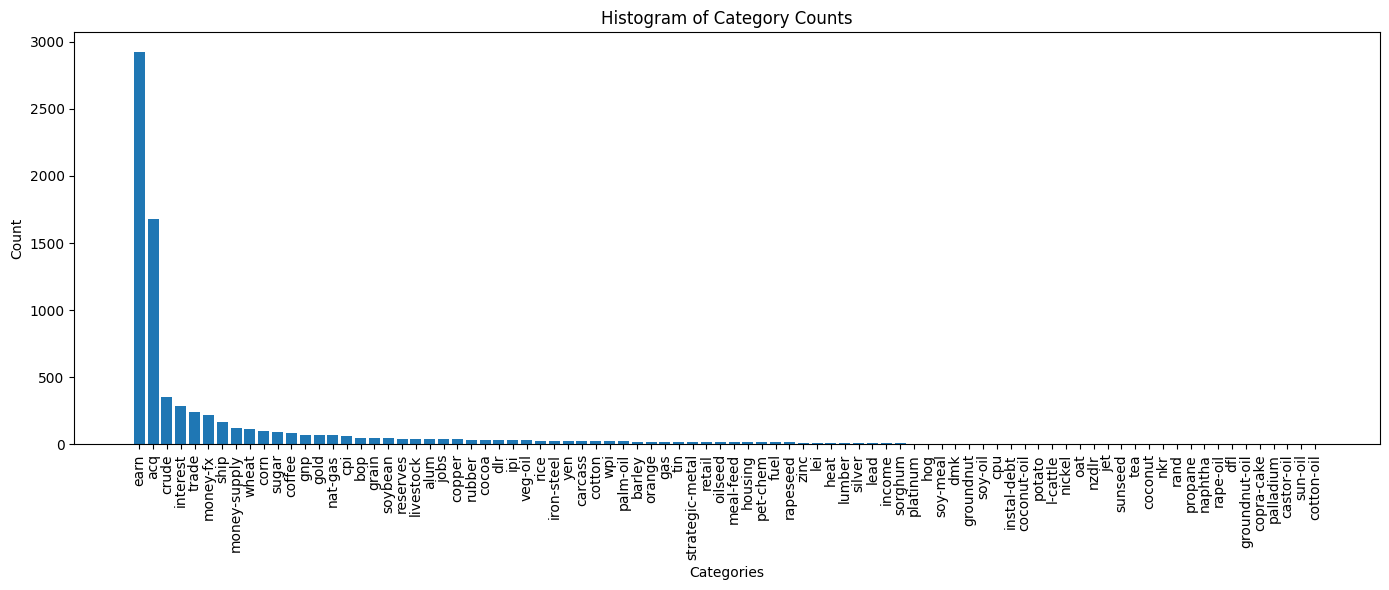

In [137]:
value_counts = df['Category'].value_counts()


plt.figure(figsize=(14, 6))
plt.bar(value_counts.index, value_counts.values)
plt.title('Histogram of Category Counts')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [138]:
print(f"No of Categories: {len(df['Category'].unique())}")

No of Categories: 86


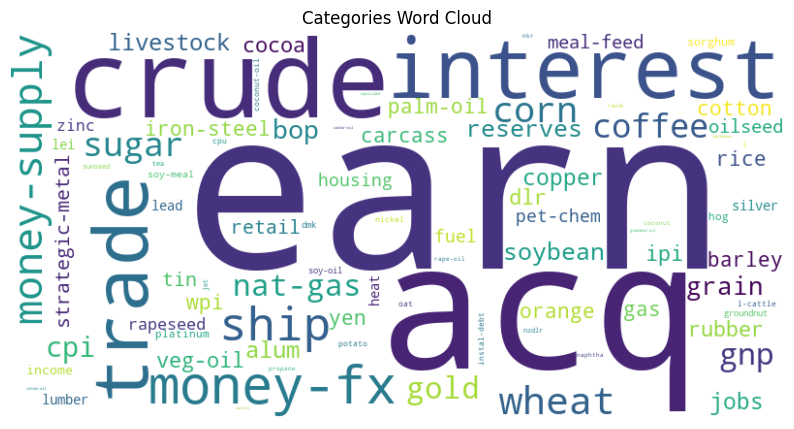

In [139]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(value_counts)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Categories Word Cloud')
plt.show()

In [140]:
def count_words(text):
    return len(text.split())

In [141]:
df['WordCount'] = df['Text'].apply(count_words)

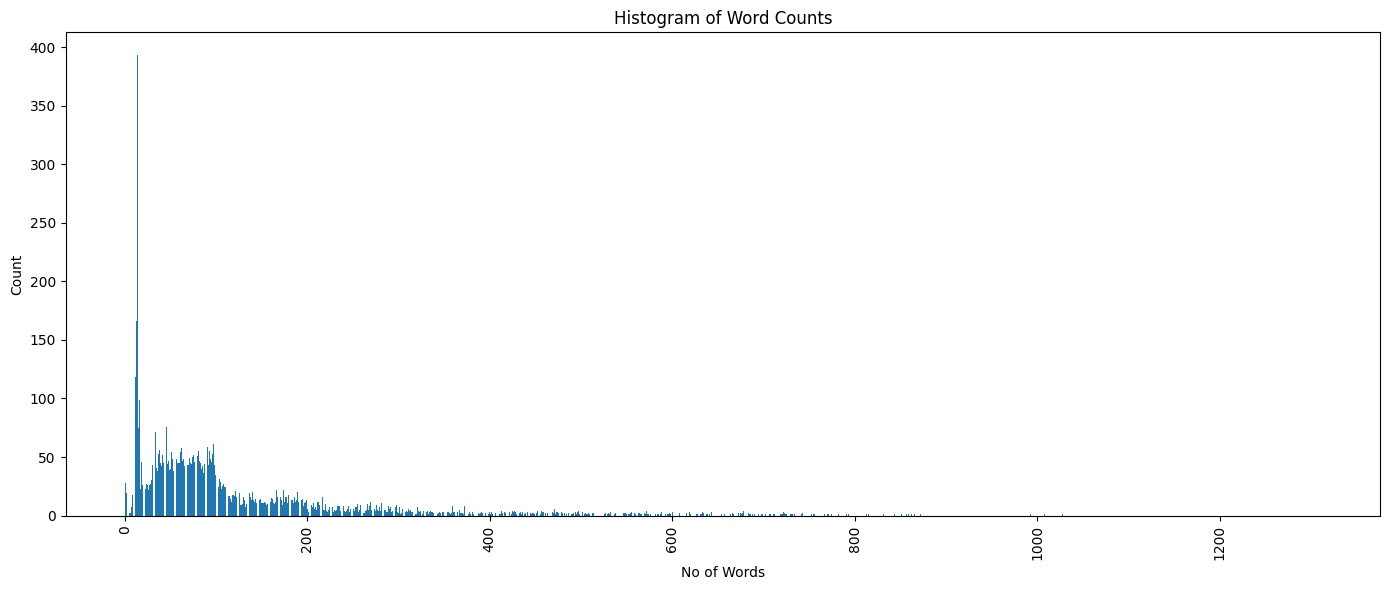

In [142]:
word_counts = df['WordCount'].value_counts()

plt.figure(figsize=(14, 6))
plt.bar(word_counts.index, word_counts.values)
plt.title('Histogram of Word Counts')
plt.xlabel('No of Words')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [143]:
word_counts

WordCount
14      393
13      166
12      118
16       99
11       97
       ... 
711       1
782       1
1028      1
641       1
326       1
Name: count, Length: 640, dtype: int64

In [144]:
total_word_count = df['WordCount'].sum()

In [145]:
print(f"Total Word Count: {total_word_count}")

Total Word Count: 953913


In [146]:
def get_token_count(text):
    words = word_tokenize(text)
    word_count = len(words)

    return word_count

In [147]:
df['TokenCount'] = df['Text'].apply(get_token_count)

In [148]:
total_token_count = df['TokenCount'].sum()

In [149]:
print(f"Total Token Count: {total_token_count}")

Total Token Count: 1062664


In [150]:
#selects the top groups that contribute to 80% of the dataset

total = 0
cumulative = []
indices = []

for index, i in enumerate(counts):
    total = total + i
    data_percentage = total/sum(counts)
    cumulative.append(data_percentage)
    indices.append(index + 1)

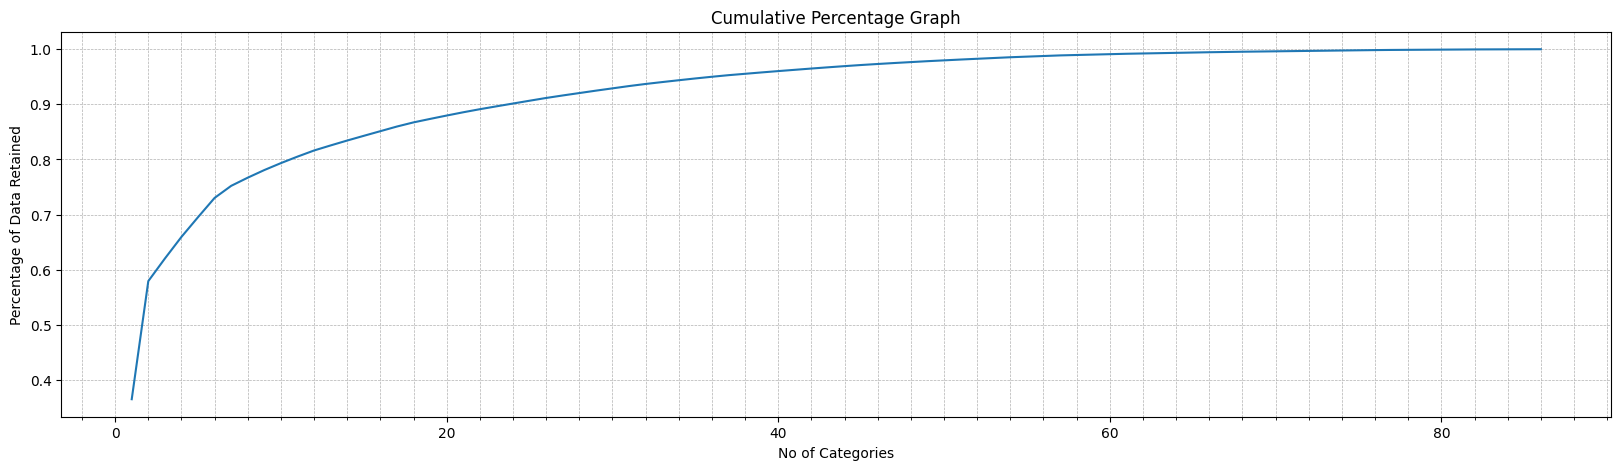

In [151]:
plt.figure(figsize=(20, 5))
plt.plot(indices, cumulative)
plt.title('Cumulative Percentage Graph')
plt.xlabel('No of Categories')
plt.ylabel('Percentage of Data Retained')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))  
plt.show()

In [152]:
#retains 60% of data with 10 categories
selected_cats = counts.index.to_list()[:6]

In [153]:
df_60 = df[df['Category'].isin(selected_cats)]

In [154]:
df_60

,Topic,Text,Category,WordCount,TokenCount
0,BAHIA COCOA REVIEW,Showers continued throughout the week in the ...,trade,486,526
9,DEAN FOODS &lt;DF> SEES STRONG 4TH QTR EARNINGS,Dean Foods Co expects earnings for the fourth...,acq,233,269
11,MAGMA LOWERS COPPER 0.75 CENT TO 66 CTS,"Magma Copper Co, a subsidiary of Newmont Mini...",interest,27,31
15,"JANUARY HOUSING SALES DROP, REALTY GROUP SAYS",Sales of previously owned homes dropped 14.5 ...,earn,92,104
16,ASSETS OF MONEY MARKET MUTUAL FUNDS ROSE 720.4...,ASSETS OF MONEY MARKET MUTUAL FUNDS ROSE 720....,earn,13,13
...,...,...,...,...,...
7764,BANK OF JAPAN INTERVENES SOON AFTER TOKYO OPENING,The Bank of Japan bought a small amount of do...,earn,81,90
7765,JAPAN RUBBER STOCKS FALL IN MARCH,"Japan's rubber stocks fell to 44,980 tonnes i...",acq,55,62
7766,SOUTH KOREAN WON FIXED AT 25-MONTH HIGH,THE BANK OF KOREA SAID IT FIXED THE MIDRATE O...,interest,54,61
7767,NIPPON MINING LOWERS COPPER PRICE,Nippon Mining Co Ltd said it lowered its sell...,earn,22,24


In [155]:
df_60.to_csv("dataset.csv", sep=',', index=False, encoding='utf-8')